<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
Before:
stroke
0    4733
1     248
Name: count, dtype: int64


After:
stroke
1    4733
0    4733
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5291 - loss: 1.0840 - val_accuracy: 0.5333 - val_loss: 0.9355
Epoch 2/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5479 - loss: 1.0348 - val_accuracy: 0.6172 - val_loss: 0.8991
Epoch 3/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5423 - loss: 1.0243 - val_accuracy: 0.6605 - val_loss: 0.8672
Epoch 4/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5729 - loss: 0.9851 - val_accuracy: 0.6880 - val_loss: 0.8498
Epoch 5/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5760 - loss: 0.9717 - val_accuracy: 0.7012 - val_loss: 0.8343
Epoch 6/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5868 - loss: 0.9472 - val_accuracy: 0.7244 - val_loss: 0.8200
Epoch 7/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5949 - loss: 0.9479 - val_accuracy: 0.7244 - val_loss: 0.8095
Epoch 8/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6190 - loss: 0.9026 - 

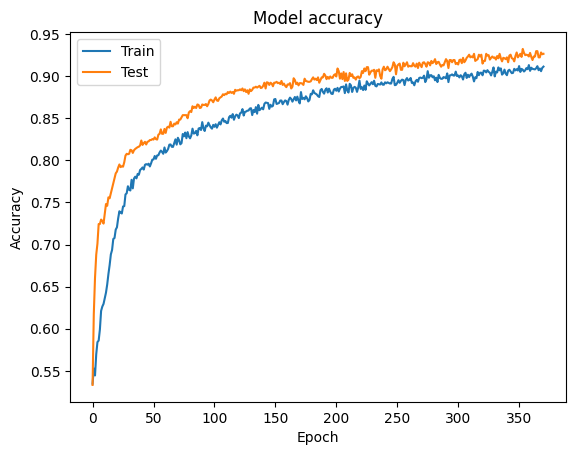

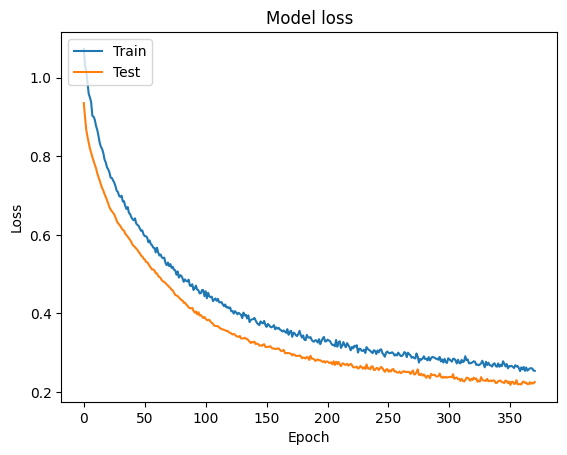

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       946
           1       0.88      0.98      0.93       948

    accuracy                           0.93      1894
   macro avg       0.93      0.93      0.93      1894
weighted avg       0.93      0.93      0.93      1894

Accuracy: 92.66%


In [ ]:


import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve, f1_score


%matplotlib inline

df1 = pd.read_csv('/content/full_data (1).csv')
df2 = pd.read_csv('/content/full_filled_stroke_data (1).csv')

df1.shape
df1.info()

df1.isna().sum()

df1.describe()

df1.nunique()

df1.head()

df1 = pd.get_dummies(df1, columns = ['work_type', 'smoking_status'])
df1['gender'] = [1 if i == 'Male' else 0 for i in df1['gender']]
df1['ever_married'] = [ 1 if i =='Yes' else 0 for i in df1['ever_married'] ]
df1['Residence_type'] = [ 1 if i =='Urban' else 0 for i in df1['Residence_type'] ]

df1.head()

X = df1.drop(columns='stroke')
y = df1['stroke']

scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(X)


scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

X.head()

scaled_df.head()

X = scaled_df

print('Before:')
print(y.value_counts())
smt = SMOTE(random_state=42)
X_smt, y_smt = smt.fit_resample(X, y)
print('\n\nAfter:')
print(y_smt.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt,test_size=0.2, random_state=42)
(y_train.shape, y_test.shape)
model = Sequential()


model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())


model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

history = model.fit(X_train, y_train,
                    epochs=1000,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[callback],
                    verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

y_pred = (model.predict(X_test) > 0.5).astype("int32")


print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
!pip install gradio
import gradio as gr

# Load datasets
df1 = pd.read_csv('/content/full_data (1).csv')
df2 = pd.read_csv('/content/full_filled_stroke_data (1).csv')

# Data preprocessing
df1 = pd.get_dummies(df1, columns=['work_type', 'smoking_status'])
df1['gender'] = df1['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df1['ever_married'] = df1['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df1['Residence_type'] = df1['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

# Features and labels
X = df1.drop(columns='stroke')
y = df1['stroke']

# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Oversampling using SMOTE to handle class imbalance
smt = SMOTE(random_state=42)
X_smt, y_smt = smt.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=42)

# Building the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback], verbose=1)

# Plotting accuracy and loss
def plot_model_performance(history):
    # Accuracy plot
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Loss plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Predict and evaluate
def evaluate_model():
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred) * 100
    classification_rep = classification_report(y_test, y_pred)

    plot_model_performance(history)

    return f"Accuracy: {accuracy:.2f}%\n\nClassification Report:\n{classification_rep}"

# Gradio interface
interface = gr.Interface(
    fn=evaluate_model,
    inputs=[],
    outputs="text",
    title="Stroke Prediction Results",
    description="Click the button below to view the stroke prediction analysis based on deep learning."
)

# Launch the Gradio interface
interface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5343 - loss: 1.0801 - val_accuracy: 0.4995 - val_loss: 0.9733
Epoch 2/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5288 - loss: 1.0595 - val_accuracy: 0.4931 - val_loss: 0.9367
Epoch 3/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5449 - loss: 1.0280 - val_accuracy: 0.5174 - val_loss: 0.9075
Epoch 4/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5492 - loss: 0.9997 - val_accuracy: 0.5533 - val_loss: 0.8801
Epoch 5/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5633 - loss: 0.9721 - val_accuracy: 0.6103 - val_loss: 0.8612
Epoch 6/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5849 - loss: 0.9584 - val_accuracy: 0.6452 - val_loss: 0.8460
Epoch 7/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5833 - loss: 0.9460 - val_accuracy: 0.6790 - val_loss: 0.8249
Epoch 8/1000
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6143 - loss: 0.9143 - 